# The White Sox suck, but by how much? 

<!-- https://pbs.twimg.com/media/F45O7ElXcAANgsk.jpg -->

[![White Sox](https://pbs.twimg.com/media/F45O7ElXcAANgsk.jpg)](https://pbs.twimg.com/media/F45O7ElXcAANgsk.jpg)

It is no doubt that the White Sox are the worst team in the MLB, but by how much? In this notebook, I will be analyzing the White Sox's performance in the 2000s season and comparing it to the their rivals, the Yankees (ok i'm kidding it's the damn Cubs).

In [1]:
import pybaseball
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import numpy as np

In [2]:
sox_colors = ["#27251F", "#C4CED4", "#C8102E"]
cubs_colors = ["#0E3386", "#CC3433", "#FFFFFF"]

In [3]:
#
start_year = 2000
end_year = datetime.datetime.now().year

In [4]:
# Let's get all the data in one go:

pitching_stats = pybaseball.pitching_stats(start_year, end_year)
chi_pitchers = pitching_stats[pitching_stats["Team"].isin(["CHW", "CHC"])]
team_data = pybaseball.team_batting(start_year, end_year)
batting_stats = pybaseball.batting_stats(start_year, end_year)
chi_batters = batting_stats[batting_stats["Team"].isin(["CHW", "CHC"])]

In [5]:
# Filter for White Sox and Cubs
chi_teams = team_data[team_data["Team"].isin(["CHW", "CHC"])]

print(chi_teams[["Team", "Season", "G", "R", "HR", "AVG", "OBP", "SLG"]])

    Team  Season     G    R   HR    AVG    OBP    SLG
8    CHW    2000  1791  978  216  0.286  0.356  0.470
36   CHC    2008  2345  855  184  0.278  0.354  0.443
53   CHW    2006  2286  868  236  0.280  0.342  0.464
65   CHW    2002  2208  856  217  0.268  0.338  0.449
83   CHW    2004  2245  865  242  0.268  0.333  0.457
90   CHW    2008  2298  811  235  0.263  0.332  0.448
113  CHW    2001  1906  798  214  0.268  0.334  0.451
125  CHW    2003  2277  791  220  0.263  0.331  0.446
126  CHC    2004  2290  789  235  0.268  0.328  0.458
151  CHW    2020   889  306   96  0.261  0.326  0.453
160  CHC    2016  2332  808  199  0.256  0.343  0.429
187  CHW    2010  2212  752  177  0.268  0.332  0.420
197  CHC    2017  2420  822  223  0.255  0.338  0.437
216  CHC    2019  2429  814  256  0.252  0.331  0.452
226  CHC    2005  2276  703  194  0.270  0.324  0.440
229  CHW    2021  2292  796  190  0.256  0.336  0.422
236  CHC    2001  2271  777  194  0.261  0.336  0.430
237  CHC    2007  2379  752 

In [6]:
avg_team_stats = chi_teams.groupby("Team").mean(numeric_only=True)
print("\nAverage team stats per season:")
print(avg_team_stats[["R", "HR", "AVG", "OBP", "SLG"]])


Average team stats per season:
           R      HR     AVG      OBP      SLG
Team                                          
CHC   704.52  176.12  0.2526  0.32372  0.41364
CHW   710.56  182.72  0.2574  0.32040  0.41756


In [7]:
# slg percentage is a measure of the total number of bases a player has made divided by their number of at bats
# obp is the sum of hits, walks, and hit by pitches divided by at bats, walks, hit by pitches, and sacrifice flies
# avg is specifically number of hits divided by at bats

In [8]:
top_hr_hitters = chi_batters.groupby(["Team", "Name"])["HR"].sum().reset_index()
top_hr_hitters = (
    top_hr_hitters.sort_values(["Team", "HR"], ascending=[True, False])
    .groupby("Team")
    .head(5)
)
print("\nTop 5 home run hitters for each team:")

# For CWS:
print("White Sox:")
print(top_hr_hitters[top_hr_hitters["Team"] == "CHW"])

print("\nCubs:")
print(top_hr_hitters[top_hr_hitters["Team"] == "CHC"])


Top 5 home run hitters for each team:
White Sox:
   Team           Name   HR
83  CHW   Paul Konerko  385
73  CHW     Jose Abreu  243
70  CHW   Jermaine Dye  164
61  CHW     Carlos Lee  136
74  CHW  Jose Valentin  136

Cubs:
   Team             Name   HR
45  CHC       Sammy Sosa  238
3   CHC    Anthony Rizzo  213
4   CHC   Aramis Ramirez  209
2   CHC  Alfonso Soriano  164
14  CHC       Derrek Lee  155


In [9]:
# find on average how much the White Sox and Cubs have outscored their opponents by

In [10]:
# find top 5 pitchers by ERA (minimum 50 innings pitched) for each team
qualified_pitchers = chi_pitchers[chi_pitchers["IP"] >= 50]
top_era_pitchers = (
    qualified_pitchers.groupby(["Team", "Name"])["ERA"].mean().reset_index()
)
top_era_pitchers = top_era_pitchers.sort_values(["Team", "ERA"]).groupby("Team").head(5)
print("\nTop 5 pitchers by ERA (min 50 IP) for each team:")
print(top_era_pitchers)


Top 5 pitchers by ERA (min 50 IP) for each team:
   Team            Name       ERA
4   CHC    Jake Arrieta  2.800000
26  CHC      Yu Darvish  2.995000
17  CHC      Mark Prior  3.050000
13  CHC   Justin Steele  3.060000
23  CHC   Shota Imanaga  3.140000
33  CHW  Esteban Loaiza  2.900000
29  CHW      Chris Sale  3.008000
46  CHW   Jose Quintana  3.347500
37  CHW      Jake Peavy  3.370000
32  CHW     Dylan Cease  3.563333


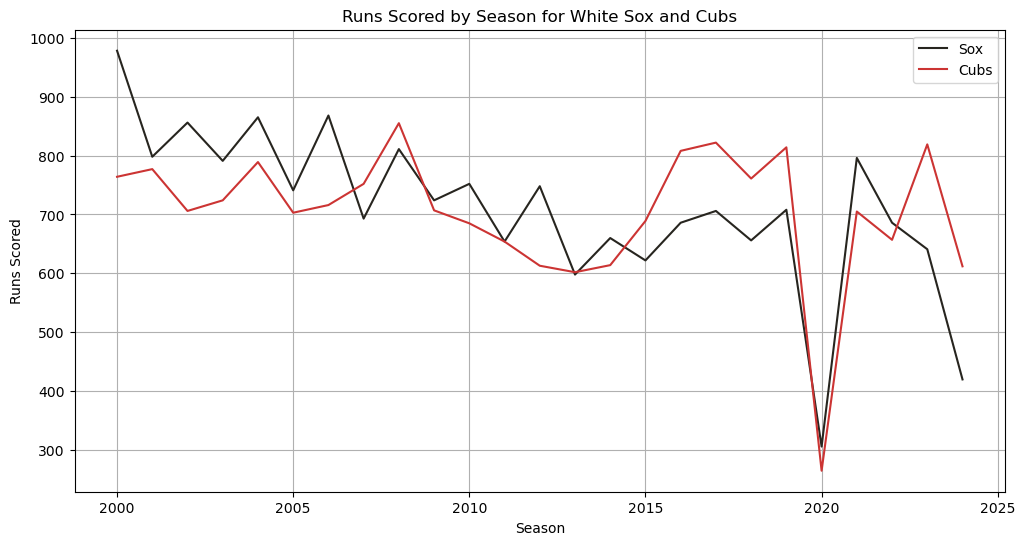

In [11]:
plt.figure(figsize=(12, 6))

# sort by year so the plot is in chronological order
for team in ["CHW", "CHC"]:
    team_data = chi_teams[chi_teams["Team"] == team]
    team_data = team_data.sort_values("Season")
    plt.plot(
        team_data["Season"],
        team_data["R"],
        label="Sox" if team == "CHW" else "Cubs",
        color=sox_colors[0] if team == "CHW" else cubs_colors[1],
    )

plt.title("Runs Scored by Season for White Sox and Cubs")
plt.xlabel("Season")
plt.ylabel("Runs Scored")
plt.legend()
plt.grid(True)
plt.show()

In [21]:
# Find the season the absolute difference between runs scored across each team


def get_season_with_max_diff(team1, team2):
    team_data["Diff"] = abs(team_data["R"] - team_data["R"])
    max_diff = team_data[team_data["Diff"] == team_data["Diff"].max()]
    return max_diff["Season"].values[0]


teams = ["CHW", "CHC"]
team_data = chi_teams[chi_teams["Team"].isin(teams)]
max_diff_season = get_season_with_max_diff(team[0], team[1])

print("\nSeason with the largest difference in runs scored:")
print(max_diff_season)


Season with the largest difference in runs scored:
2000


In [14]:
cubs_data_chrono = chi_teams[chi_teams["Team"] == "CHC"].sort_values("Season")
sox_data_chrono = chi_teams[chi_teams["Team"] == "CHW"].sort_values("Season")

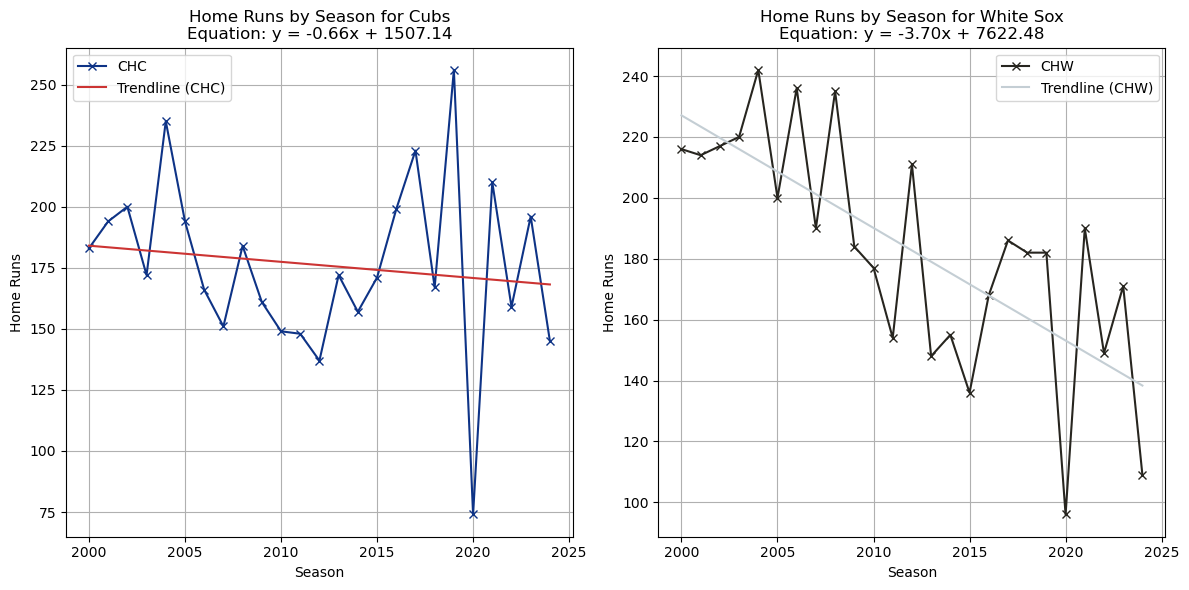

In [15]:
x_chc = cubs_data_chrono["Season"]
y_chc = cubs_data_chrono["HR"]
trendline_chc = np.polyfit(x_chc, y_chc, 1)[0] * x_chc + np.polyfit(x_chc, y_chc, 1)[1]
coefficients_chc = np.polyfit(x_chc, y_chc, 1)

x_chw = sox_data_chrono["Season"]
y_chw = sox_data_chrono["HR"]
trendline_chw = np.polyfit(x_chw, y_chw, 1)[0] * x_chw + np.polyfit(x_chw, y_chw, 1)[1]
coefficients_chw = np.polyfit(x_chw, y_chw, 1)

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].plot(x_chc, y_chc, marker="x", label="CHC", color=cubs_colors[0])
axs[0].plot(x_chc, trendline_chc, color=cubs_colors[1], label="Trendline (CHC)")
axs[0].set_title(
    f"Home Runs by Season for Cubs\nEquation: y = {coefficients_chc[0]:.2f}x + {coefficients_chc[1]:.2f}"
)
axs[0].set_xlabel("Season")
axs[0].set_ylabel("Home Runs")
axs[0].legend()
axs[0].grid(True)

axs[1].plot(x_chw, y_chw, marker="x", label="CHW", color=sox_colors[0])
axs[1].plot(x_chw, trendline_chw, color=sox_colors[1], label="Trendline (CHW)")
axs[1].set_title(
    f"Home Runs by Season for White Sox\nEquation: y = {coefficients_chw[0]:.2f}x + {coefficients_chw[1]:.2f}"
)
axs[1].set_xlabel("Season")
axs[1].set_ylabel("Home Runs")
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()

plt.show()

In [ ]:
# TODO: More analysis across different stats.